# 1. Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import os
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline


In [2]:

# google.colab import drive
# drive.mount("/content/drive")

# os.chdir("/content/drive/MyDrive/Colab Notebooks/SUML/datasets")

In [3]:
os.getcwd()

'c:\\Users\\klips\\Documents\\PJATK\\7 - Zimowy\\SUML\\suml-lab-ClipLee'

# 2. Przygotowanie danych do analizy

In [4]:
base_data = pd.read_csv("Lab03/datasets/DSP_6.csv")

In [5]:
train = pd.read_csv('Lab03/datasets/DSP_6.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Brakujące dane

In [7]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

<Axes: >

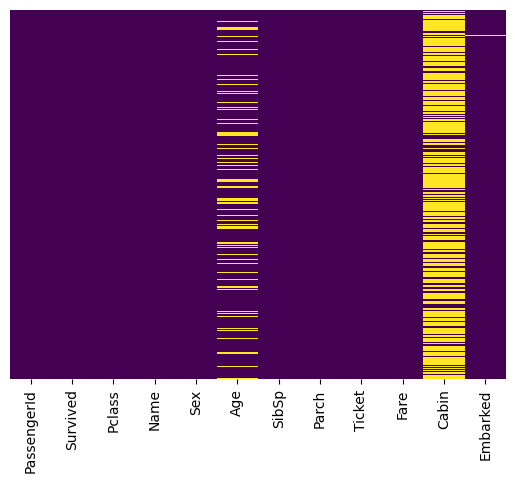

In [8]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

Wywalamy kolumnę z brakującymi danymi

In [9]:
train.drop(columns=["Cabin"], inplace=True)

<Axes: >

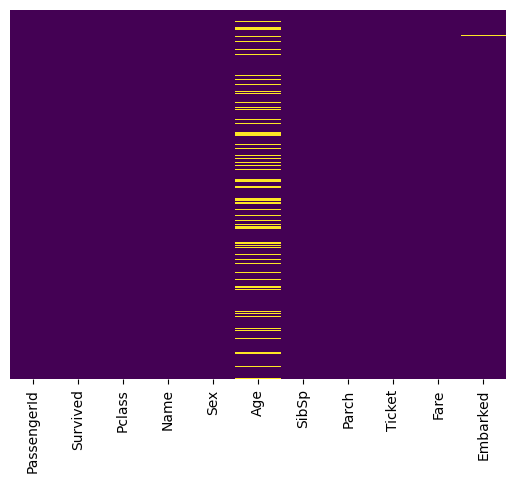

In [10]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Znajduję puste wartości

In [11]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

Uuzupełniamy brakujące dane średnią

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

<Axes: >

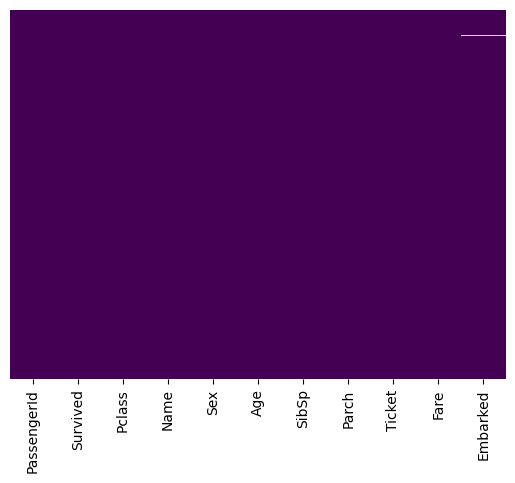

In [14]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [15]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

Odrzucamy wiersze z brakującymi danymi

In [16]:
train.dropna(inplace=True)

<Axes: >

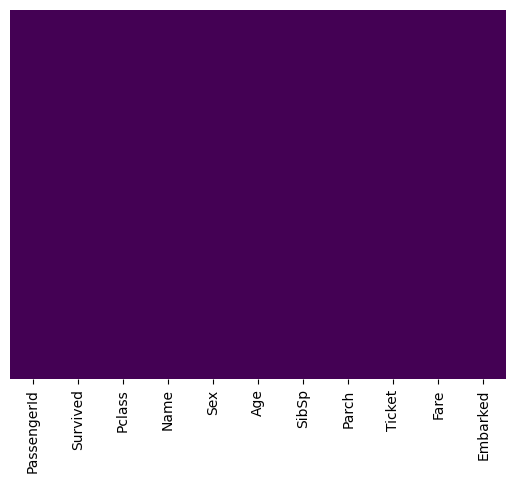

In [17]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [18]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

## Eksploracja danych

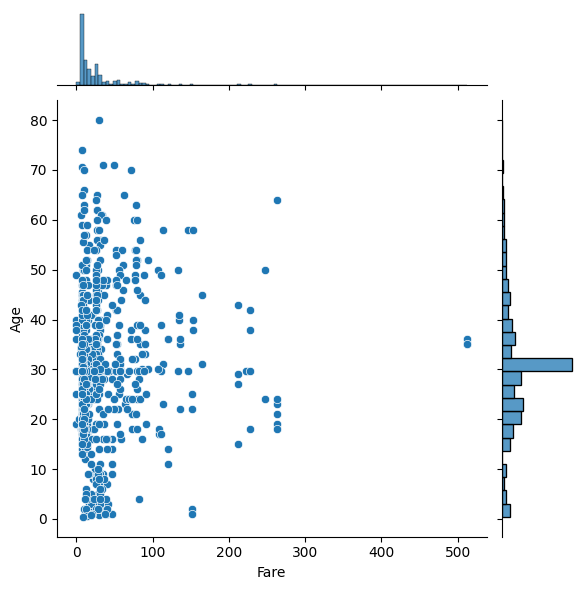

In [19]:
sns.jointplot(x="Fare", y="Age", data=train)

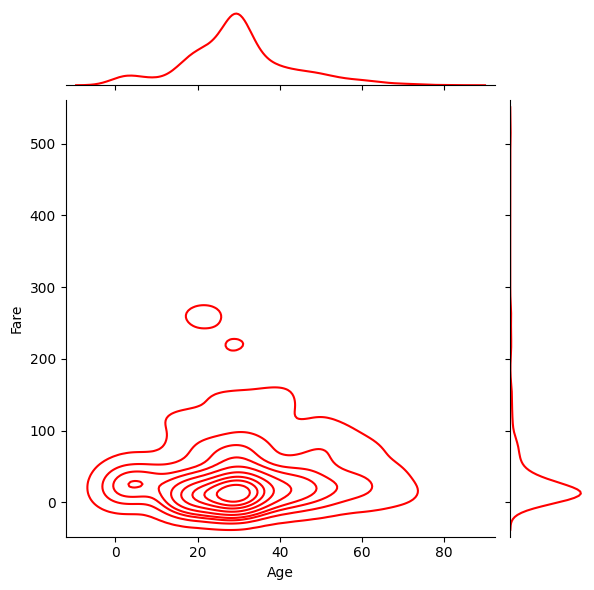

In [20]:
sns.jointplot(x="Age", y="Fare", data=train, color='red', kind='kde')

<Axes: xlabel='Survived', ylabel='count'>

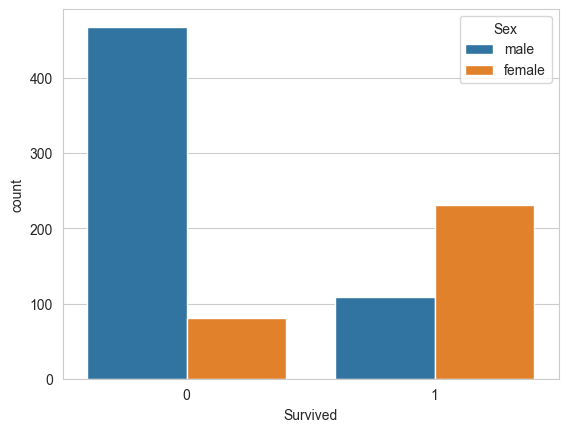

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue="Sex")

<Axes: xlabel='Survived', ylabel='count'>

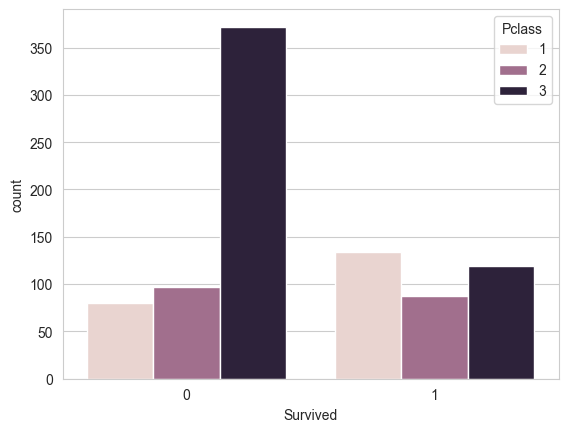

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue="Pclass")

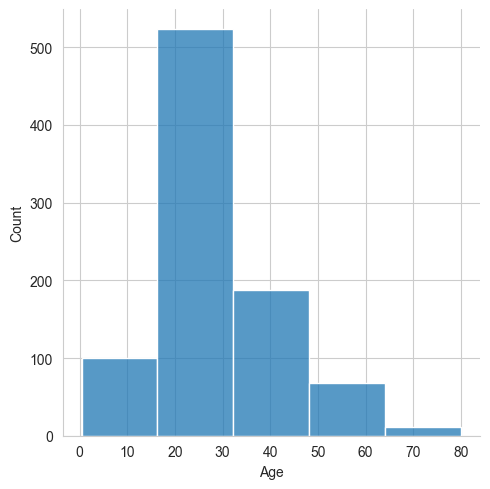

In [23]:
sns.displot(train['Age'], kde=False, bins=5)

C:\Users\klips\AppData\Local\Temp\ipykernel_29516\2268720333.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

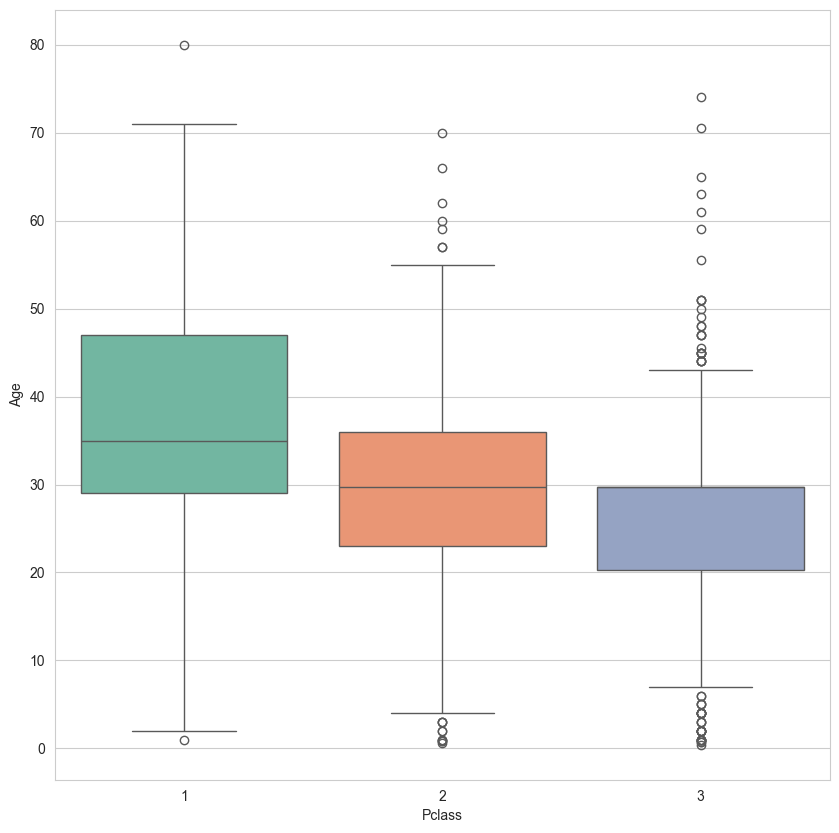

In [24]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass', y='Age', data=train, palette='Set2')

In [25]:
cf.go_offline()

In [26]:
train["Age"].iplot(kind="hist", bins=30)


## Konwersja danycyh do modelu regresji

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
sex = pd.get_dummies(train["Sex"], drop_first=True)
embark = pd.get_dummies(train["Embarked"], drop_first=True)

In [29]:
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [30]:
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [31]:
train = pd.concat([train, sex, embark], axis=1)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [33]:
train.drop(["Sex", "Embarked", "Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [34]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


# 3. Regresja logistyczna

In [35]:
X = train.drop("Survived", axis=1)
y=train["Survived"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [37]:
logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        57
           1       0.83      0.75      0.79        32

    accuracy                           0.85        89
   macro avg       0.85      0.83      0.84        89
weighted avg       0.85      0.85      0.85        89



In [39]:
confusion_matrix(y_test, predictions)

array([[52,  5],
       [ 8, 24]], dtype=int64)

# Zadanie 1

*Załaduj ponownie zbiór danych (`DSP_6.csv`), ale nie wykonuj jeszcze operacji na brakujących wartościach. Poszukaj innego sposobu wyświetlenia informacji o brakujących wartościach - wyświetl liczbę brakujących danych.*

In [40]:
df = pd.read_csv('Lab03/datasets/DSP_6.csv')
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Zadanie 2

*Dodaj kilka kolejnych wykresów w celu dalszej eksploracji danych. Stwórz wykres, który będzie pokazywać informację dotyczącą liczby członków rodziny na pokładzie. Stwórz wykres, który będzie pokazywać informację dotyczącą opłaty, która została uiszczona przez pasażerów. Z uwagi na to, że dane te zawierają przypadki odstające zmień jego wielkość za pomocą parametru `figsize`.*

In [41]:
# Wyświetlenie liczby członków rodziny na pokładzie
df["Liczba członków rodziny"] = df["SibSp"] + df["Parch"]

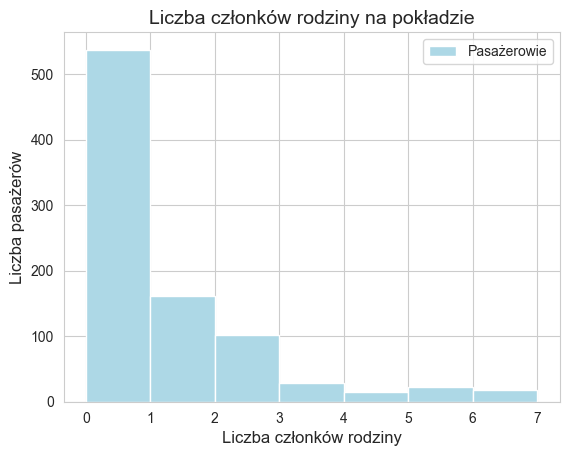

In [42]:
plt.hist(df["Liczba członków rodziny"],
         bins=range(0, 8),
         color="lightblue")
plt.title("Liczba członków rodziny na pokładzie", fontsize=14)
plt.xlabel("Liczba członków rodziny", fontsize=12)
plt.ylabel("Liczba pasażerów", fontsize=12)
plt.xticks(range(0, 8))
plt.legend(["Pasażerowie"], loc="upper right")

plt.show()


Text(0.5, 1.0, 'Rozkład opłat za bilety')

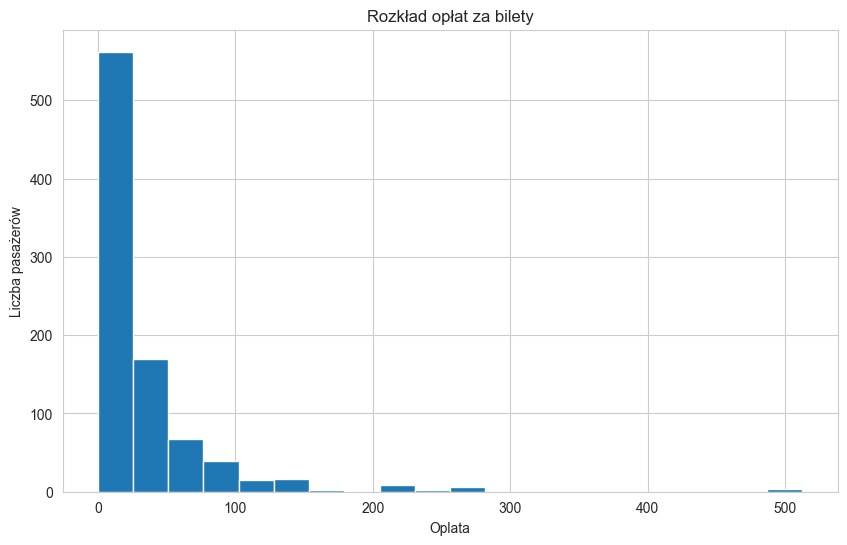

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(df['Fare'], bins=20)
plt.xlabel('Oplata')
plt.ylabel('Liczba pasażerów')
plt.title('Rozkład opłat za bilety')